In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
print(input_img)

Tensor("input_2:0", shape=(?, 784), dtype=float32)


In [4]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [18]:
print(x_train.shape)
print(x_test.shape)
print(len(x_test))
print(x_test)

(60000, 28, 28)
(10000, 28, 28)
10000
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


In [19]:
#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(x_test)

(60000, 784)
(10000, 784)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 0.3795 - val_loss: 0.2729
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.2661 - val_loss: 0.2558
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.2456 - val_loss: 0.2331
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.2252 - val_loss: 0.2150
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 0.2099 - val_loss: 0.2024
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1991 - val_loss: 0.1929
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1904 - val_loss: 0.1848
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 0.1827 - val_loss: 0.1777
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 0.1761 - val_loss: 0.1716
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1704 - val_loss: 0.1664

In [21]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

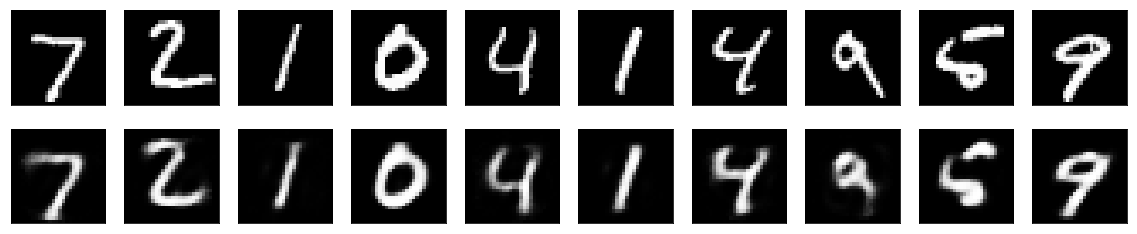

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
from keras import regularizers

In [25]:
encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [28]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s - loss: 0.2962 - val_loss: 0.2959
Epoch 2/100
60000/60000 [==============================] - 2s - loss: 0.2954 - val_loss: 0.2951
Epoch 3/100
60000/60000 [==============================] - 2s - loss: 0.2947 - val_loss: 0.2944
Epoch 4/100
60000/60000 [==============================] - 2s - loss: 0.2940 - val_loss: 0.2937
Epoch 5/100
60000/60000 [==============================] - 2s - loss: 0.2933 - val_loss: 0.2930
Epoch 6/100
60000/60000 [==============================] - 2s - loss: 0.2926 - val_loss: 0.2924
Epoch 7/100
60000/60000 [==============================] - 2s - loss: 0.2920 - val_loss: 0.2917
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.2914 - val_loss: 0.2911
Epoch 9/100
60000/60000 [==============================] - ETA: 0s - loss: 0.290 - 2s - loss: 0.2908 - val_loss: 0.2906
Epoch 10/100
60000/60000 [==============================] - 2s

In [30]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10844054653596964144
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 209649664
locality {
  bus_id: 1
}
incarnation: 5814308990410084344
physical_device_desc: "device: 0, name: GeForce GTX 745, pci bus id: 0000:01:00.0"
]


In [7]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess)

In [5]:
import sys
import tensorflow as tf
tf.__version__
device_name = sys.argv[0]
print(device_name)

/home/prapan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py
